In [135]:
import matplotlib.pyplot as plt
% matplotlib inline

In [136]:
import random

class Dice:

    def roll(self):
        roll = random.randint(1,6)
        return roll


class Opponent:

    def __init__(self, name = "Pig Opponent"):
        self.dice = Dice()
        self.score = 0
        self.total_score = 0
        self.count = 0
        self.name = name
        
    def __str__(self):
        return self.name

    def roll(self):
        return self.dice.roll()

    def round_score(self):
        roll = self.roll()
        if roll > 1:
            self.score += roll
        else:
            self.score = 0

        return self.score

    def roll_or_hold(self):
        response = self.decision()
        self.decision()
        if response == 'hold':

            self.total_score += self.score
            self.score = 0
            self.count = 0
            return self.total_score
        elif response == 'roll':

            self.round_score()

            return self.roll_or_hold()
        elif response == 'bust':

            self.count = 0
            return self.total_score

    def decision(self):
        if self.count > 0:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"


class Player:

    def __init__(self):
        self.dice = Dice()
        self.score = 0
        self.total_score = 0
        self.count = 0

    def roll(self):
        return self.dice.roll()

    def round_score(self):
        roll = self.roll()
        if roll > 1:
            self.score += roll
        else:
            self.score = 0
        return self.score

    def roll_or_hold(self):
        if self.score == 0 and self.count > 0:
            print(self.count)
            print("You bust")
            self.count = 0
            return self.total_score
        else:
            response = input(
            "\nDo you want to roll or hold? (Roll/Hold)".lower())
            if response == 'hold':
                print("You hold")
                self.total_score += self.score
                self.score = 0
                self.count = 0
                return self.total_score
            if response == 'roll':
                print("You roll")
                self.round_score()
                print("your score this round: ", self.score)
                print("your total score: ", self.total_score)
                self.count += 1
                return self.roll_or_hold()

In [137]:
class PigMoves18(Opponent):

    def decision(self):
        if self.score > 18:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"

In [138]:
class PigMoves19(Opponent):

    def decision(self):
        if self.score > 19:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"

In [139]:
class PigMoves20(Opponent):

    def decision(self):
        if self.score > 20:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"

In [140]:
class PigMoves21(Opponent):

    def decision(self):
        if self.score > 21:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"

In [163]:
class Game:

    def __init__(self):
        self.p1 = PigMoves21()
        self.p2 = PigMoves20()
        self.round_count = 0

    def p1_turn(self):
        self.p1.roll_or_hold()

    def p2_turn(self):
        self.p2.roll_or_hold()

    def play_round_me(self):
            self.p1_turn()
            self.p2_turn()

    def play_round_you(self):
            self.p2_turn()
            self.p1_turn()

    def full_game(self):
        while self.round_count < 7:
            self.play_round_me()
            self.round_count += 1
        if self.p1.total_score > self.p2.total_score:
            return "{} BEATS {}! Final score is {}, to {}.".format(
            self.p1, self.p2, self.p1.total_score, self.p2.total_score)
        else:
            return "{} BEATS {}! Final score is {}, to {}.".format(
            self.p2, self.p1, self.p1.total_score, self.p2.total_score)

In [164]:
class FullGame(Game):
    
    def full_game(self):
        while self.round_count < 7:
            self.play_round_me()
            self.round_count += 1
        if self.p1.total_score > self.p2.total_score:
            return 1
        elif self.p1.total_score < self.p2.total_score:
            return 2
        elif self.p1.total_score == self.p2.total_score:
            return 3
        
    def game_scores(self):
        return self.p1.total_score, self.p2.total_score

In [165]:
def pig_trials(number = 10):
    game_wins = []
    final_score = []
    for num in range(number):
        game = FullGame()
        game_wins.append(game.full_game())
        final_score.append(game.game_scores())
    return game_wins, final_score

In [166]:
trial_results = []
score_results = []
for number in [10, 100, 1000, 10000, 100000]:
    trial_results.append(pig_trials(number)[0])
    score_results.append(pig_trials(number)[1])

In [167]:
average_p1 = 0
average_p2 = 0
trials_average = []

for trials in score_results:
    average_p1 = 0
    average_p2 = 0
    for scores in trials:
        average_p1 += scores[0]
        average_p2 += scores[1]
    average_p1 = average_p1/len(trials)
    average_p2 = average_p2/len(trials)
    trials_average.append((average_p1, average_p2))

In [168]:
one = 0
two = 0
tie = 0
total_results = []
for results in trial_results:
    one = 0
    two = 0
    tie = 0
    one += results.count(1)
    two += results.count(2)
    tie += results.count(3)
    total_results.append([one, two, tie])

# 19 count vs 20 count

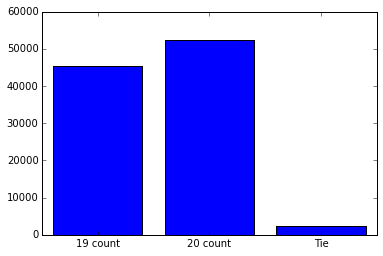

In [147]:
y = total_results[4]
x = range(len(y))
z = "19 count", "20 count", "Tie"

plt.bar(x, y, align = "center")
plt.xticks([0,1,2], z)

fig = plt.gcf()

# 19 count vs 20 count average

In [148]:
trials_average[4]

(56.8909, 56.90949)

# 21 count vs 20 count

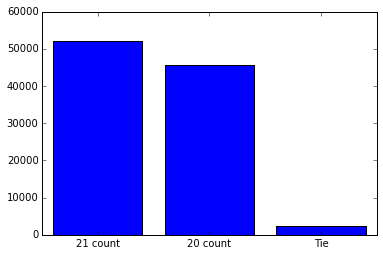

In [169]:
y = total_results[4]
x = range(len(y))
z = "21 count", "20 count", "Tie"

plt.bar(x, y, align = "center")
plt.xticks([0,1,2], z)

fig = plt.gcf()

# 21 count vs 20 count average

In [170]:
trials_average[4]

(56.88058, 56.94342)

My original hypothesis for this project was that around 17 would be the optimal range for dice rolls, however after crunching the data it would seem that 20 is the optimal value to aim for when playing pig. While this may not be reflected in the amounts of wins for holding for 20 vs 21, the average score is higher, as it was when playing against a bot that held above 19. While it may not hold up in a set amount of rounds, I could imagine it would hold up better when it is set up for who can get to a certain score higher. Again, this is because of the higher amount of average points it would yield.